In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

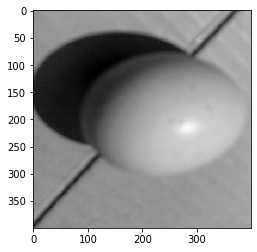

(400, 400)


In [7]:
cat = ['egg']

for category in cat:
    for img in os.listdir('eggs'):
        img_array= cv2.imread('eggs/' + img, 0)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        print(img_array.shape)
        break
    break
        
    

In [8]:
data = []
cat = ['eggs', 'neg']
def create_train():
    for category in range(len(cat)):
        for img in os.listdir(cat[category])[:276]:
            try:
        
                img_array= cv2.imread(cat[category] + '/' + img)
                img_array= cv2.resize(img_array, (100, 100))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                
        
                data.append([img_array, category])  
            except:
                print(img)
            
create_train()

.ipynb_checkpoints


In [9]:
import random



In [10]:
random.shuffle(data)

In [11]:
x, y = [], []

In [12]:
for features, labels in data:
    x.append(features)
    y.append(labels)

In [13]:
x = np.array(x).reshape(-1,100, 100,  1)
y = np.array(y)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [15]:
x = x/255.0

In [16]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=x.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x, y, batch_size=32, epochs=3, validation_split=0.3)

Epoch 1/3
13/13 [==============================] - 16s 1s/step - loss: 1.6240 - accuracy: 0.6519 - val_loss: 0.5806 - val_accuracy: 0.6807
Epoch 2/3
13/13 [==============================] - 16s 1s/step - loss: 0.3205 - accuracy: 0.8571 - val_loss: 0.2604 - val_accuracy: 0.8675
Epoch 3/3
13/13 [==============================] - 16s 1s/step - loss: 0.1226 - accuracy: 0.9558 - val_loss: 0.2846 - val_accuracy: 0.8614


In [28]:
model.save('eggfirst.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: eggfirst.model/assets


In [18]:
import requests

url = 'https://cdn.vox-cdn.com/thumbor/CyGR5jAu364WZtRApk3UXbQd-oE=/0x0:876x584/920x613/filters:focal(368x222:508x362):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/62841097/instagram_egg.0.jpg'


In [23]:
def format(url):
    resp = requests.get(url, stream=True).raw
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (100, 100))
    image = image.reshape(-1, 100, 100, 1)
    return model.predict([image])
    



In [25]:
format(url)

array([[1.]], dtype=float32)

In [27]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook
import cv2
import time
output_notebook()

cap = cv2.VideoCapture(0)
ret, frame = cap.read()
frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
frame=cv2.flip(frame, -1) # because Bokeh flips vertically
width=frame.shape[1]
height=frame.shape[0]
p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=width, height=height)
myImage = p.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
show(p, notebook_handle=True)
while True:
    ret, frame = cap.read()
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    frame=cv2.flip(frame, -1)
    myImage.data_source.data['image']=[frame]
    push_notebook()
    time.sleep(0.01)

Loading BokehJS ...

error: OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
